# Import

In [1]:
# Basic
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')

# ML Toolkit
from robusta.crossval import *
from robusta.selector import *
from robusta.preprocessing import *

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import *

# Model
from sklearn.linear_model import Ridge

# Plot
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

# Data

In [21]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=200, n_features=50, n_informative=5, 
                       random_state=666)

X = pd.DataFrame(X)
y = pd.Series(y)

X.rename(columns=lambda x: 'x{}'.format(x), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Task & Model

In [22]:
get_score = lambda y_true, y_pred: -mean_squared_error(y_true, y_pred)
scoring = 'neg_mean_squared_error'

cv = 5

model = Ridge()

# Baseline

In [23]:
_, y_pred = crossval_predict(model, cv, X_train, y_train, X_new=X_test,
                             scoring=scoring, verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[04:43:24]  Ridge

[04:43:24]  FOLD  0:   -6.8685
[04:43:24]  FOLD  1:   -8.7267
[04:43:24]  FOLD  2:   -10.6242
[04:43:24]  FOLD  3:   -20.1918
[04:43:24]  FOLD  4:   -13.1002

[04:43:24]  AVERAGE:   -11.9023 ± 4.6305



-9.600466067788235

# Differential Evolution

In [26]:
selector = GeneticSelector(model, cv, scoring, max_iter=1000)
selector.fit(X_train, y_train)

[04:46:00] ITER: 1/1000      SUBSET: 23/50      SCORE: -19379.4176 ± 4043.0096      ETA: 18 sec
[04:46:00] ITER: 2/1000      SUBSET: 21/50      SCORE: -16814.5341 ± 5306.5052      ETA: 19 sec
[04:46:00] ITER: 3/1000      SUBSET: 25/50      SCORE: -16078.9778 ± 3588.7700      ETA: 19 sec
[04:46:00] ITER: 4/1000      SUBSET: 24/50      SCORE: -17321.8046 ± 4573.6070      ETA: 19 sec
[04:46:00] ITER: 5/1000      SUBSET: 26/50      SCORE: -13968.5861 ± 3283.3981      ETA: 19 sec
[04:46:00] ITER: 6/1000      SUBSET: 20/50      SCORE: -4546.9108 ± 418.1152      ETA: 19 sec
[04:46:00] ITER: 7/1000      SUBSET: 26/50      SCORE: -6093.1580 ± 1292.9892      ETA: 19 sec
[04:46:00] ITER: 8/1000      SUBSET: 28/50      SCORE: -8908.7623 ± 1188.2943      ETA: 19 sec
[04:46:00] ITER: 9/1000      SUBSET: 24/50      SCORE: -24395.2415 ± 5254.7336      ETA: 19 sec
[04:46:00] ITER: 10/1000      SUBSET: 22/50      SCORE: -4452.1797 ± 538.5968      ETA: 19 sec
[04:46:00] ITER: 11/1000      SUBSET: 28/50  

[04:46:02] ITER: 85/1000      SUBSET: 27/50      SCORE: -16108.1184 ± 4157.8396      ETA: 18 sec
[04:46:02] ITER: 86/1000      SUBSET: 30/50      SCORE: -18590.3114 ± 4074.0052      ETA: 18 sec
[04:46:02] ITER: 87/1000      SUBSET: 24/50      SCORE: -5550.1222 ± 1583.5993      ETA: 18 sec
[04:46:02] ITER: 88/1000      SUBSET: 23/50      SCORE: -5747.3647 ± 1362.7283      ETA: 18 sec
[04:46:02] ITER: 89/1000      SUBSET: 29/50      SCORE: -7846.7199 ± 666.5440      ETA: 18 sec
[04:46:02] ITER: 90/1000      SUBSET: 28/50      SCORE: -7205.0299 ± 1636.0684      ETA: 18 sec
[04:46:02] ITER: 91/1000      SUBSET: 24/50      SCORE: -4.4869 ± 1.0661      ETA: 18 sec
[04:46:02] ITER: 92/1000      SUBSET: 25/50      SCORE: -5057.4126 ± 1290.3251      ETA: 18 sec
[04:46:02] ITER: 93/1000      SUBSET: 26/50      SCORE: -8477.7205 ± 2395.2712      ETA: 18 sec
[04:46:03] ITER: 94/1000      SUBSET: 27/50      SCORE: -5.1135 ± 2.0362      ETA: 18 sec
[04:46:03] ITER: 95/1000      SUBSET: 24/50      SC

[04:46:05] ITER: 176/1000      SUBSET: 26/50      SCORE: -4.9167 ± 2.1727      ETA: 16 sec
[04:46:05] ITER: 177/1000      SUBSET: 27/50      SCORE: -5.0375 ± 1.8023      ETA: 16 sec
[04:46:05] ITER: 178/1000      SUBSET: 27/50      SCORE: -4.5918 ± 1.3630      ETA: 16 sec
[04:46:05] ITER: 179/1000      SUBSET: 24/50      SCORE: -2038.4115 ± 228.1630      ETA: 16 sec
[04:46:05] ITER: 180/1000      SUBSET: 22/50      SCORE: -4.1094 ± 0.9944      ETA: 16 sec
[04:46:05] ITER: 181/1000      SUBSET: 30/50      SCORE: -5.8967 ± 2.2147      ETA: 16 sec
[04:46:05] ITER: 182/1000      SUBSET: 23/50      SCORE: -4.6043 ± 0.6795      ETA: 16 sec
[04:46:05] ITER: 183/1000      SUBSET: 26/50      SCORE: -4.8398 ± 1.4805      ETA: 16 sec
[04:46:05] ITER: 184/1000      SUBSET: 29/50      SCORE: -4.9525 ± 1.3618      ETA: 16 sec
[04:46:05] ITER: 185/1000      SUBSET: 25/50      SCORE: -4.3285 ± 1.1391      ETA: 16 sec
[04:46:05] ITER: 186/1000      SUBSET: 20/50      SCORE: -4.1359 ± 1.5626      ETA: 1

[04:46:08] ITER: 267/1000      SUBSET: 25/50      SCORE: -4.4535 ± 1.5898      ETA: 14 sec
[04:46:08] ITER: 268/1000      SUBSET: 28/50      SCORE: -4.6287 ± 1.1403      ETA: 14 sec
[04:46:08] ITER: 269/1000      SUBSET: 21/50      SCORE: -3.6571 ± 0.9992      ETA: 14 sec
[04:46:08] ITER: 270/1000      SUBSET: 23/50      SCORE: -4.4350 ± 1.7121      ETA: 14 sec
[04:46:08] ITER: 271/1000      SUBSET: 27/50      SCORE: -4.7806 ± 1.4602      ETA: 14 sec
[04:46:08] ITER: 272/1000      SUBSET: 23/50      SCORE: -4.2206 ± 0.7968      ETA: 14 sec
[04:46:08] ITER: 273/1000      SUBSET: 19/50      SCORE: -3.5069 ± 0.7983      ETA: 14 sec
[04:46:08] ITER: 274/1000      SUBSET: 20/50      SCORE: -4.1566 ± 1.5098      ETA: 14 sec
[04:46:08] ITER: 275/1000      SUBSET: 19/50      SCORE: -3.7019 ± 1.3475      ETA: 14 sec
[04:46:08] ITER: 276/1000      SUBSET: 23/50      SCORE: -4.0728 ± 0.9924      ETA: 14 sec
[04:46:08] ITER: 277/1000      SUBSET: 21/50      SCORE: -4.0239 ± 1.0147      ETA: 14 sec

[04:46:11] ITER: 358/1000      SUBSET: 20/50      SCORE: -3.9247 ± 1.6921      ETA: 12 sec
[04:46:11] ITER: 359/1000      SUBSET: 16/50      SCORE: -3.5675 ± 1.3544      ETA: 12 sec
[04:46:11] ITER: 360/1000      SUBSET: 23/50      SCORE: -3.8089 ± 1.0001      ETA: 12 sec
[04:46:11] ITER: 361/1000      SUBSET: 18/50      SCORE: -3.6346 ± 1.1526      ETA: 12 sec
[04:46:11] ITER: 362/1000      SUBSET: 19/50      SCORE: -3.6161 ± 0.9307      ETA: 12 sec
[04:46:11] ITER: 363/1000      SUBSET: 19/50      SCORE: -3.5019 ± 0.9688      ETA: 12 sec
[04:46:11] ITER: 364/1000      SUBSET: 20/50      SCORE: -3.6939 ± 1.1967      ETA: 12 sec
[04:46:11] ITER: 365/1000      SUBSET: 17/50      SCORE: -3.7840 ± 1.2866      ETA: 12 sec
[04:46:11] ITER: 366/1000      SUBSET: 16/50      SCORE: -3.4711 ± 0.8270      ETA: 12 sec
[04:46:11] ITER: 367/1000      SUBSET: 14/50      SCORE: -3.2502 ± 0.9659      ETA: 12 sec
[04:46:11] ITER: 368/1000      SUBSET: 17/50      SCORE: -3.6589 ± 1.2254      ETA: 12 sec

[04:46:14] ITER: 449/1000      SUBSET: 12/50      SCORE: -3.1143 ± 1.0206      ETA: 10 sec
[04:46:14] ITER: 450/1000      SUBSET: 13/50      SCORE: -3.1556 ± 0.9390      ETA: 10 sec
[04:46:14] ITER: 451/1000      SUBSET: 14/50      SCORE: -3.1725 ± 0.9262      ETA: 10 sec
[04:46:14] ITER: 452/1000      SUBSET: 14/50      SCORE: -3.1710 ± 0.8366      ETA: 10 sec
[04:46:14] ITER: 453/1000      SUBSET: 12/50      SCORE: -3.2389 ± 1.0639      ETA: 10 sec
[04:46:14] ITER: 454/1000      SUBSET: 16/50      SCORE: -3.2983 ± 0.9559      ETA: 10 sec
[04:46:14] ITER: 455/1000      SUBSET: 10/50      SCORE: -3.0145 ± 0.8748      ETA: 10 sec
[04:46:14] ITER: 456/1000      SUBSET: 12/50      SCORE: -3.1105 ± 0.7352      ETA: 10 sec
[04:46:14] ITER: 457/1000      SUBSET: 11/50      SCORE: -3.0173 ± 0.8738      ETA: 10 sec
[04:46:14] ITER: 458/1000      SUBSET: 14/50      SCORE: -3.2151 ± 0.7602      ETA: 10 sec
[04:46:14] ITER: 459/1000      SUBSET: 11/50      SCORE: -3.0445 ± 0.9461      ETA: 10 sec

[04:46:17] ITER: 546/1000      SUBSET: 9/50      SCORE: -2.8761 ± 0.7424      ETA: 8 sec
[04:46:17] ITER: 547/1000      SUBSET: 10/50      SCORE: -2.9807 ± 0.9880      ETA: 8 sec
[04:46:17] ITER: 548/1000      SUBSET: 8/50      SCORE: -1726.6260 ± 222.6695      ETA: 8 sec
[04:46:17] ITER: 549/1000      SUBSET: 8/50      SCORE: -2.8629 ± 0.8646      ETA: 8 sec
[04:46:17] ITER: 550/1000      SUBSET: 10/50      SCORE: -2.9670 ± 0.9006      ETA: 8 sec
[04:46:17] ITER: 551/1000      SUBSET: 11/50      SCORE: -3.0824 ± 0.8491      ETA: 8 sec
[04:46:17] ITER: 552/1000      SUBSET: 12/50      SCORE: -3.0402 ± 0.8728      ETA: 8 sec
[04:46:17] ITER: 553/1000      SUBSET: 8/50      SCORE: -2.9093 ± 0.7653      ETA: 8 sec
[04:46:17] ITER: 554/1000      SUBSET: 8/50      SCORE: -2.8629 ± 0.8646      ETA: 8 sec
[04:46:17] ITER: 555/1000      SUBSET: 11/50      SCORE: -3.0371 ± 0.8653      ETA: 8 sec
[04:46:17] ITER: 556/1000      SUBSET: 10/50      SCORE: -2.9582 ± 0.9088      ETA: 8 sec
[04:46:17]

[04:46:20] ITER: 644/1000      SUBSET: 9/50      SCORE: -2.8715 ± 0.7474      ETA: 7 sec
[04:46:20] ITER: 645/1000      SUBSET: 8/50      SCORE: -2.8367 ± 0.7377      ETA: 7 sec
[04:46:20] ITER: 646/1000      SUBSET: 8/50      SCORE: -2.8629 ± 0.8646      ETA: 7 sec
[04:46:20] ITER: 647/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 6 sec
[04:46:20] ITER: 648/1000      SUBSET: 9/50      SCORE: -2.8931 ± 0.6557      ETA: 6 sec
[04:46:20] ITER: 649/1000      SUBSET: 9/50      SCORE: -2.9058 ± 0.8404      ETA: 6 sec
[04:46:20] ITER: 650/1000      SUBSET: 7/50      SCORE: -11390.4365 ± 2490.2016      ETA: 6 sec
[04:46:20] ITER: 651/1000      SUBSET: 8/50      SCORE: -2.8629 ± 0.8646      ETA: 6 sec
[04:46:20] ITER: 652/1000      SUBSET: 9/50      SCORE: -2.9099 ± 0.8051      ETA: 6 sec
[04:46:20] ITER: 653/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 6 sec
[04:46:20] ITER: 654/1000      SUBSET: 10/50      SCORE: -2.8836 ± 0.7492      ETA: 6 sec
[04:46:20] IT

[04:46:23] ITER: 742/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 5 sec
[04:46:23] ITER: 743/1000      SUBSET: 12/50      SCORE: -3.1618 ± 0.7848      ETA: 5 sec
[04:46:23] ITER: 744/1000      SUBSET: 8/50      SCORE: -2.8081 ± 0.7472      ETA: 5 sec
[04:46:23] ITER: 745/1000      SUBSET: 8/50      SCORE: -2.8081 ± 0.7472      ETA: 5 sec
[04:46:23] ITER: 746/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 5 sec
[04:46:23] ITER: 747/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 5 sec
[04:46:23] ITER: 748/1000      SUBSET: 8/50      SCORE: -2.8367 ± 0.7377      ETA: 4 sec
[04:46:24] ITER: 749/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 4 sec
[04:46:24] ITER: 750/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 4 sec
[04:46:24] ITER: 751/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 4 sec
[04:46:24] ITER: 752/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 4 sec
[04:46:24] ITER: 753

[04:46:26] ITER: 840/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 3 sec
[04:46:26] ITER: 841/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 3 sec
[04:46:27] ITER: 842/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 3 sec
[04:46:27] ITER: 843/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 3 sec
[04:46:27] ITER: 844/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 3 sec
[04:46:27] ITER: 845/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 3 sec
[04:46:27] ITER: 846/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 3 sec
[04:46:27] ITER: 847/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 3 sec
[04:46:27] ITER: 848/1000      SUBSET: 9/50      SCORE: -1706.9449 ± 231.7390      ETA: 3 sec
[04:46:27] ITER: 849/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 2 sec
[04:46:27] ITER: 850/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 2 sec
[04:46:27] ITER:

[04:46:30] ITER: 933/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 1 sec
[04:46:30] ITER: 934/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 1 sec
[04:46:30] ITER: 935/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 1 sec
[04:46:30] ITER: 936/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 1 sec
[04:46:30] ITER: 937/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 1 sec
[04:46:30] ITER: 938/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 1 sec
[04:46:30] ITER: 939/1000      SUBSET: 9/50      SCORE: -1726.9092 ± 233.9554      ETA: 1 sec
[04:46:30] ITER: 940/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 1 sec
[04:46:30] ITER: 941/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 1 sec
[04:46:30] ITER: 942/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 1 sec
[04:46:30] ITER: 943/1000      SUBSET: 7/50      SCORE: -2.8003 ± 0.7469      ETA: 1 sec
[04:46:30] ITER:

GeneticSelector(crossover=0.7, cv=5,
                estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                max_iter=None, normalize=False,
                                random_state=None, solver='auto', tol=0.001),
                max_iter=1000, max_time=None, mut_prob=0.1, mut_rate=0.05,
                n_digits=4, n_jobs=None, pop_size=50, random_state=None,
                scoring='neg_mean_squared_error', std=-0.1, verbose=1)

<IPython.core.display.Javascript object>


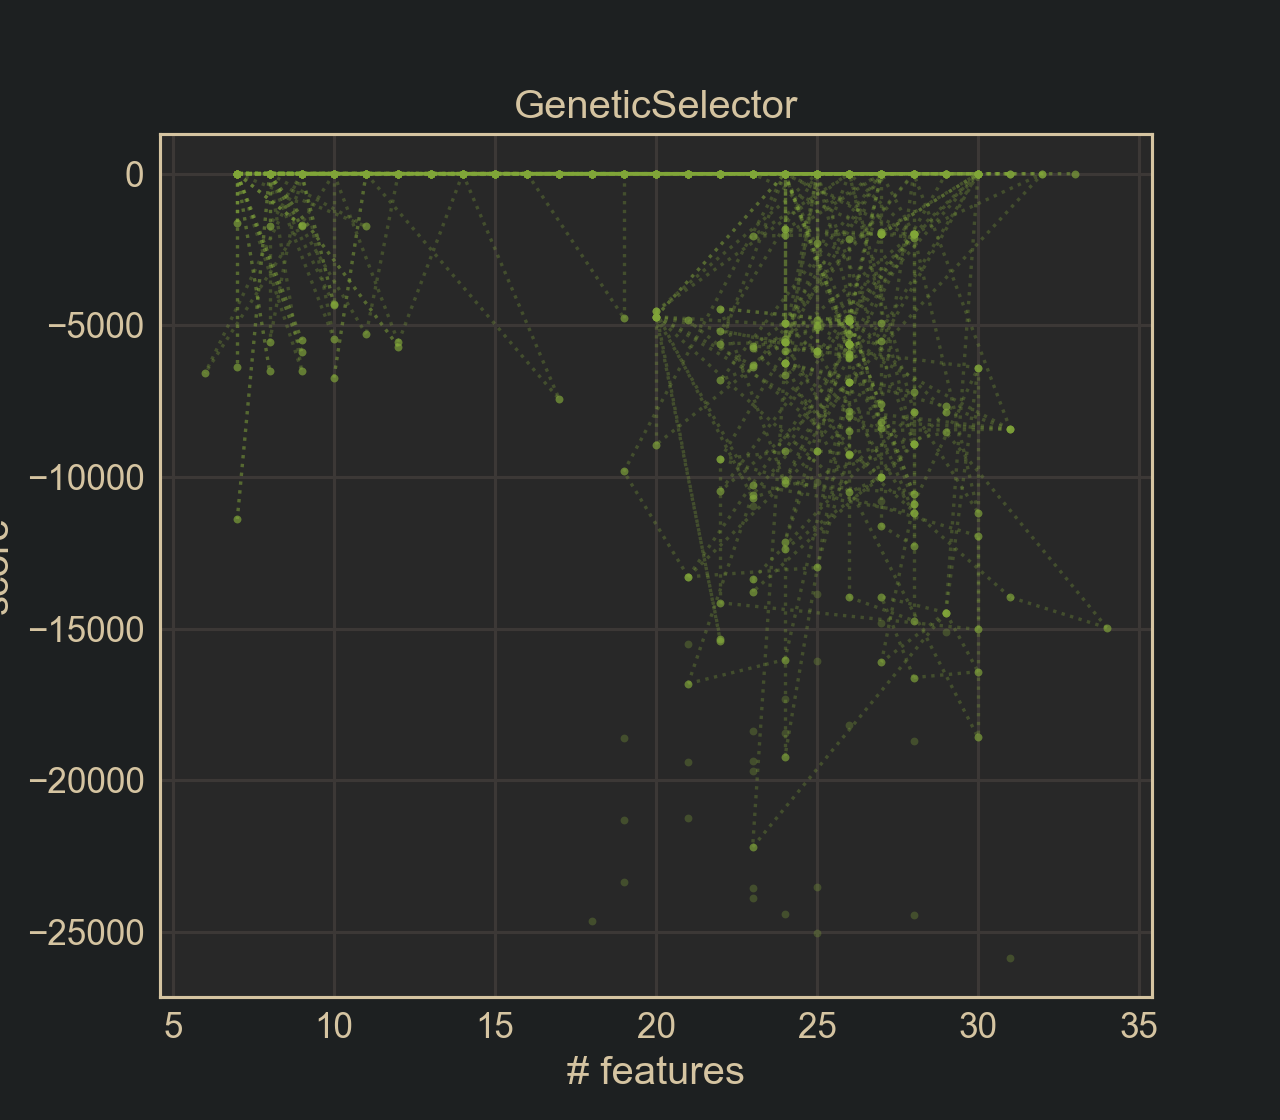

In [27]:
%matplotlib notebook

selector.plot(marker='.', color='g', linestyle=':', alpha=0.3)

In [46]:
box.bounds

(0.0, 20.0, -5.0, -20.0)

In [51]:
%matplotlib notebook

from matplotlib.transforms import Bbox

box = Bbox([[0, 20], [-5, 0]])

selector.plot(marker='.', color='g', linestyle=':', alpha=0.3, ylimits=[-5, 0])

<IPython.core.display.Javascript object>

AttributeError: Unknown property ylimits

In [7]:
X_train_ = selector.transform(X_train)
X_test_  = selector.transform(X_test)

_, y_pred = crossval_predict(model, cv, X_train_, y_train, X_new=X_test_,
                             scoring=scoring, verbose=2, n_jobs=-1)

get_score(y_test, y_pred)

[04:35:19]  Ridge

[04:35:19]  FOLD  0:   -2.7230
[04:35:19]  FOLD  1:   -2.4167
[04:35:19]  FOLD  2:   -1.8138
[04:35:19]  FOLD  3:   -3.4021
[04:35:19]  FOLD  4:   -1.7065

[04:35:19]  AVERAGE:   -2.4124 ± 0.6217



-2.420157957633676

In [8]:
selector.get_subset()

FeatureSubset(['x10' 'x16' 'x19' 'x25' 'x28' 'x29' 'x36' 'x44'])

# Differential Evolution (Group)

In [55]:
i = 2
k = 5
func = lambda x: (i*k <= int(x[1:]) < i*k+k)

#[x for x in X_train if func(x)]
X_train.columns[X_train.columns.map(func)]

Index(['x10', 'x11', 'x12', 'x13', 'x14'], dtype='object')

In [13]:


#ColumnGrouper()
#X_train



s = ColumnSelector()
s.fit_transform(X_train)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
79,0.924638,-0.458881,1.675270,1.545856,1.174273,-1.447355,-1.427905,-1.483573,-1.040668,-0.134175,...,-0.069420,-0.287719,0.110127,-0.353122,-1.865664,0.115667,0.599086,-1.479407,-0.361646,1.009443
197,0.853347,-0.389080,-0.548979,-0.233621,-0.595247,1.408547,-0.292713,0.435604,-1.405519,0.517679,...,-0.421490,0.046050,-0.426641,-1.635531,0.914047,-0.211057,-0.048594,0.549261,-0.095825,-0.013624
38,-1.286527,-1.021965,1.112729,1.166195,-0.536940,0.242401,-2.339891,0.132466,-0.581371,-0.770331,...,-0.042133,1.887234,-2.164202,0.186548,0.146403,0.063455,-1.070575,2.085116,-1.515392,-0.023734
24,-1.921082,-1.945524,-1.235310,1.032729,-0.843074,-0.750707,0.830309,-0.378819,-1.030774,1.171543,...,-0.425204,-0.951962,-0.553894,1.392175,0.975670,1.198084,0.733158,-1.221143,-2.215713,-0.011210
122,1.544318,2.101613,-1.481622,0.447739,-0.924046,-0.511474,-0.708703,0.130291,-0.779979,-2.070147,...,0.789787,0.441155,0.182715,1.309564,-1.239939,0.811405,-0.425675,-2.179905,-0.160814,-0.314087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.616855,0.312075,-0.505777,-0.670151,0.747201,0.061859,-0.196145,0.398577,0.381527,-0.647369,...,-1.607627,-0.150597,1.899005,-1.792778,-0.802560,2.104725,-0.104431,1.252028,-0.741509,-2.380641
14,1.677128,1.597251,-0.197574,-0.428889,-0.626220,-0.118218,-1.853054,-1.479926,1.178236,0.107689,...,-0.393123,-0.239452,1.538816,-0.736272,1.860053,-0.042949,-3.103916,0.516133,-1.640558,0.605985
92,1.319507,-0.374697,0.181910,-0.755100,0.749837,0.460237,-0.564057,-0.185643,-0.502900,-1.192589,...,0.072571,-0.372955,0.240492,0.034488,-0.991030,0.258708,0.282763,-1.376814,-0.940408,-2.232977
179,0.415623,1.316133,-1.388109,0.373652,-1.238512,-0.706704,0.962477,-1.459485,-1.157150,-1.330585,...,-1.081663,0.109985,-0.710280,0.918187,-0.430674,-0.099369,-0.201156,-2.586488,-0.986474,1.045544


In [ ]:
selector = GroupGeneticSelector(model, cv, scoring)
selector.fit(X_train, y_train)